In [228]:
import cv2
import math
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle


from time import time
from mpl_toolkits.mplot3d import Axes3D

import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Model
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout


from gtts import gTTS
from playsound import playsound

#####################################################################################
# Initiate mediapipe 


mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

In [229]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [230]:
df = pd.read_csv('coords_4.csv') #dataset

In [231]:
X = df.drop('class', axis=1) # features
y = df['class'] # target value

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69) #spliting data into training and testing

In [233]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [234]:
y.unique().shape[0]

7

In [235]:
X.shape

(650, 126)

In [236]:
pipelines = {
    'lr':make_pipeline(RobustScaler(), LogisticRegression()),
    'rc':make_pipeline(RobustScaler(), RidgeClassifier()),
    'svc':make_pipeline(RobustScaler(), SVC()),
    'xgb':make_pipeline(RobustScaler(), XGBClassifier()),
    'rf':make_pipeline(RobustScaler(), RandomForestClassifier()),
    'gb':make_pipeline(RobustScaler(), GradientBoostingClassifier())
}

In [237]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = pipeline.fit(X_train, y_train)
    fit_models[algo] = model

C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecati

[10:13:14] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [238]:
fit_models

{'lr': Pipeline(memory=None,
          steps=[('robustscaler',
                  RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                               with_centering=True, with_scaling=True)),
                 ('logisticregression',
                  LogisticRegression(C=1.0, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False),
 'rc': Pipeline(memory=None,
          steps=[('robustscaler',
                  RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                               with_centering=True, with_scaling=True)),
                 ('ridgecla

In [239]:
for algo, model in fit_models.items():
    yhat = model.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.9179487179487179
rc 0.9435897435897436
svc 0.9230769230769231
xgb 0.9230769230769231
rf 0.9384615384615385
gb 0.9384615384615385


C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [240]:
#making a function that did everything above
def fit_predict(model,X_test, y_test):
    y_pred=model.predict(X_test)
    print("Model name: " + type(model.steps[1][1]).__name__ )
    print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
    print("classification report\n")
    print(classification_report(y_test,y_pred))
    print("\n")
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred), display_labels=fit_models['gb'].classes_).plot(cmap='viridis')
    #plt.title(f'Confusion matrix of {model} model on test data')
    plt.show()

Model name: XGBClassifier
Accuracy score: 0.9230769230769231
classification report

              precision    recall  f1-score   support

       Empty       0.60      1.00      0.75        15
       Hello       1.00      0.67      0.80        15
           I       1.00      1.00      1.00        18
      assist       1.00      0.93      0.96        44
      people       0.97      0.95      0.96        37
          to       1.00      0.98      0.99        44
        want       0.82      0.82      0.82        22

    accuracy                           0.92       195
   macro avg       0.91      0.91      0.90       195
weighted avg       0.94      0.92      0.93       195





C:\Users\Isfan\anaconda3\envs\Capstone-NLP\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


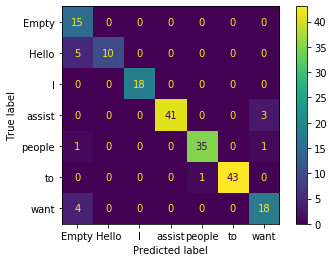

In [241]:
fit_predict(fit_models['xgb'], X_test, y_test)

In [242]:
with open('model.pkl', 'wb') as f:
    pickle.dump(fit_models['xgb'], f)

In [249]:
from gtts import gTTS
from playsound import playsound

In [253]:
tts = gTTS("people")

In [254]:
tts.save("audio/people.mp3")

In [166]:
playsound("audio/My.mp3")

In [220]:
vid_path = 'dataset/vids/hello.mp4'

In [243]:
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

In [255]:
import pygame

import time

pygame.init()




temp = ''
timer = 10
cap = cv2.VideoCapture(1)  #Might need to change from 1 to a different number... default system camera is usually 0.
## Setup mediapipe instance
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
        image.flags.writeable = False                  # Image is no longer writeable
        results = holistic.process(image)                 # Make prediction
        image.flags.writeable = True                   # Image is now writeable 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
        image.flags.writeable = False
      
        
        # Extract landmarks
        try:
            #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
            lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
            rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
            #landmarks = np.concatenate([pose, lh, rh])
            landmarks = np.concatenate([lh, rh])
            

            # Make Detections
            X = pd.DataFrame([landmarks])
            classification = model.predict(X)[0]
            probability = model.predict_proba(X)[0]
            print(classification, np.round(probability,2))
            
            #if (np.amax(np.round(probability,2)) > .1):
                # Get status box
            cv2.rectangle(image, (0,0), (590, 60), (100, 100, 10), -1)
            cv2.putText(image, 'CLASS', (130,15), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, 'PROB', (15,15), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(round(probability[np.argmax(probability)],2)), (10,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            if (np.amax(np.round(probability,2)) > .90):
                # Displaying classification
                cv2.putText(image, classification, (120,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                timer = timer -1
                if (classification != temp):
                    timer = 10
                    temp = classification
                    pygame.mixer.music.load("audio/"+ classification+".mp3")
                    pygame.mixer.music.play()
                    #playsound('audio/'+classification + ".mp3")
      
                if (timer < 1):
                    temp = ''

            # Displaying probability
                
        
        
        except:
            pass
        
        
         # Render detections
        #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
        # Draw pose connections
        #mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
        # Draw left hand connections
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
        # Draw right hand connections  
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)        
        
        cv2.imshow('Mediapipe Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53

Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
want [0.05 0.09 0.05 0.02 0.09 0.12 0.58]
want [0.01 0.02 0.01 0.05 0.09 0.11 0.71]
want [0.   0.   0.   0.01 0.07 0.   0.91]
want [0.   0.   0.   0.01 0.11 0.01 0.85]
want [0.01 0.01 0.01 0.03 0.25 0.02 0.67]
want [0.01 0.01 0.01 0.03 0.23 0.02 0.69]
want [0.01 0.01 0.01 0.03 0.23 0.02 0.7 ]
want [0.02 0.01 0.02 0.05 0.12 0.16 0.62]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.

I [0.   0.   0.98 0.   0.01 0.   0.  ]
I [0.   0.   0.99 0.   0.   0.   0.  ]
I [0.   0.   0.99 0.   0.   0.   0.  ]
I [0.   0.   0.99 0.   0.01 0.   0.  ]
I [0.   0.   0.97 0.   0.02 0.   0.  ]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04

Hello [0.   0.99 0.   0.   0.   0.   0.  ]
Hello [0.   0.99 0.   0.   0.   0.   0.01]
Hello [0.   0.99 0.   0.   0.   0.   0.  ]
want [0.12 0.1  0.15 0.04 0.25 0.05 0.29]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
I [0.   0.   0.97 0.   0.02 0.   0.  ]
I [0.   0.   0.97 0.   0.02 0.   0.  ]
I [0.   0.   0.97 0.   0.02 0.   0.  ]
I [0.   0.   0.97 0.   0.02 0.   0.  ]
I [0.   0.   0.8  0.   0.19 0.   0.  ]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 

Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53 0.15 0.03 0.   0.04 0.   0.24]
Empty [0.53